In [1]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
plt.xkcd();
import seaborn as sns
import math
import random

random.seed(48)

import warnings
warnings.filterwarnings("ignore")

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [4]:
x.shape, y.shape

((506, 13), (506,))

In [5]:
x[505, 0:5]

array([ 0.04741,  0.     , 11.93   ,  0.     ,  0.573  ])

# TASK 1

## 1.1 Random Records & Features

In [6]:
def random_split(randomness, index_range):
    randomness = randomness / 100

    def randoms():
        return randomness

    records = list(range(0,index_range))
    features = list(range(0,13))

    random.shuffle(records, randoms)
    random.shuffle(features)

    return records, features

## 1.2 Dataset Split

In [7]:
def dataset_percentage(random_state, data, target, percentage, tot = x.shape[0]):
    
    if percentage == 60:
        indices_length = math.floor(tot * percentage / 100)
        rows, cols = random_split(random_state, data.shape[0])
        
        train_data_rows = rows[:indices_length]
        cols = cols[:8]
        oob_rows = rows[indices_length:]
        
        df_data = data[:, cols]
        train_data = df_data[train_data_rows, :]
        train_target = target[train_data_rows]
        
        oob_data = df_data[oob_rows, :]
        oob_target = target[oob_rows]
        
        return train_data, train_target, cols, train_data_rows, oob_data, oob_target, oob_rows
        
    elif percentage == 40:
        indices_length = math.ceil(tot * percentage / 100)
        rows, _ = random_split(random_state, data.shape[0])
        
        rows = rows[:indices_length]
        
        data = data[rows, :]
        target = target[rows]
        
        return data, target

## 1.3 BootStrap Samples 

In [8]:
def bootstrap(random_state):
    
    X_60, y_60, cols, rows, oob_data, oob_target, oob_rows = dataset_percentage(random_state, x, y, 60) #60 percentage of 506 points = 303 data points
    
    X_60 = np.asarray(X_60) 
    y_60 = np.asarray(y_60)
    
    X_40, y_40 = dataset_percentage(random_state, X_60, y_60, 40) #40 percentage of 303 points = 203 data points
    
    X_40 = np.asarray(X_40)
    y_40 = np.asarray(y_40)
    
    X = np.concatenate((X_60, X_40), axis=0)
    Y = np.concatenate((y_60, y_40), axis=0)
    
    return X, Y, cols, rows, oob_data, oob_target, oob_rows

## 1.4 Model Training

In [9]:
models_1 = []
datasets_1 = []

oob_records_1 = []

rows_index_1 = []
feature_index_1 = []

pop_MSE_1 = []
OOB_1 = []

for i in range(30):
    X, Y, cols, rows, oob_data, oob_target, oob_rows = bootstrap(i)
    
    oob_records_1.append(oob_rows)
    
    X = np.asarray(X)
    Y = np.asarray(Y)

    feature_index_1.append(cols)
    rows_index_1.append(rows)
    
    datasets_1.append((X, Y))
    
    print(color.BOLD + "Dataset - " + color.END + str(i+1), color.RED + color.BOLD \
          + "\n\tshape :", color.END + str(X.shape) + str(Y.shape) )
    
    model = DecisionTreeRegressor(random_state=2)
    model.fit(X, Y)
    models_1.append(model)
    
    mse = mean_squared_error(Y, model.predict(X)) #ith model MSE in Dataset 1
    overall_mse = mean_squared_error(y, model.predict(x[:, cols])) #ith model MSE in overall Dataset 1
    
    pop_MSE_1.append(overall_mse)
    oob_pred = model.predict(oob_data)
    
    oob_score = np.sum(np.subtract(oob_target, oob_pred)**2)
    oob_score = oob_score // x.shape[0]
    
    OOB_1.append(oob_score)
    
    print(color.BOLD + "Model - " + color.END + str(i+1), color.RED + color.BOLD + 
          "\n\tsample {} MSE is : ".format(i+1) + color.END, str(mse), color.RED + color.BOLD \
          + "\n\tOOB-SCORE : " + color.END, str(oob_score), color.RED + color.BOLD + "\n\tpopulation MSE : " \
          + color.END, np.round(overall_mse, 3) , "\n")

print(color.BLUE + color.BOLD + "Population MSE (median pred of 30 Models) : " + color.END, \
      np.median(np.asarray(pop_MSE_1)))

Dataset - 1 
	shape : (506, 8)(506,)
Model - 1 
	sample 1 MSE is :  7.483265504072839e-32 
	OOB-SCORE :  27.0 
	population MSE :  27.801 

Dataset - 2 
	shape : (506, 8)(506,)
Model - 2 
	sample 2 MSE is :  0.0 
	OOB-SCORE :  21.0 
	population MSE :  21.979 

Dataset - 3 
	shape : (506, 8)(506,)
Model - 3 
	sample 3 MSE is :  0.0 
	OOB-SCORE :  12.0 
	population MSE :  12.138 

Dataset - 4 
	shape : (506, 8)(506,)
Model - 4 
	sample 4 MSE is :  0.0 
	OOB-SCORE :  16.0 
	population MSE :  16.893 

Dataset - 5 
	shape : (506, 8)(506,)
Model - 5 
	sample 5 MSE is :  0.0 
	OOB-SCORE :  27.0 
	population MSE :  27.449 

Dataset - 6 
	shape : (506, 8)(506,)
Model - 6 
	sample 6 MSE is :  0.0 
	OOB-SCORE :  34.0 
	population MSE :  34.335 

Dataset - 7 
	shape : (506, 8)(506,)
Model - 7 
	sample 7 MSE is :  0.2585210803689064 
	OOB-SCORE :  34.0 
	population MSE :  34.19 

Dataset - 8 
	shape : (506, 8)(506,)
Model - 8 
	sample 8 MSE is :  0.0 
	OOB-SCORE :  34.0 
	population MSE :  34.22 

D

## 1.5 OOB Score

In [10]:
oob_pred = []

oob_score = 0

for df_row_index, data_point in enumerate(x):
    oob_model_index = []
    pred = []
    
    for model_index, oob_data_indices in enumerate(oob_records_1):
        if df_row_index in oob_data_indices:
            oob_model_index.append(model_index)
            
    for index in oob_model_index:
        model = models_1[index]
        feature_cols = feature_index_1[index]
        data = np.take(data_point, feature_cols).reshape(1, -1)
        model_pred = model.predict(data)
        pred.append(model_pred)
        
    if sum(pred) == 0:
        pred = 0
    else:
        pred = np.median(np.asarray(pred))
        
    oob_pred.append(pred)
        
oob_score = np.median(np.asarray(oob_pred))

print(color.BLUE + color.BOLD + "Population OOB-SCORE (Median of 30 models pred): " + str(oob_score) + color.END)

Population OOB-SCORE (Median of 30 models pred): 15.7


# 2. TASK :

## 2.1 Model Training

In [11]:
models_2 = []
datasets_2 = []

oob_records_2 = []

rows_index_2 = []
feature_index_2 = []

pop_MSE_2 = []
OOB_2 = []

for i in range(35):
    X, Y, cols, rows, oob_data, oob_target, oob_rows = bootstrap(i)
    
    oob_records_2.append(oob_rows)
    
    X = np.asarray(X)
    Y = np.asarray(Y)

    feature_index_2.append(cols)
    rows_index_2.append(rows)
    
    datasets_2.append((X, Y))
    
    print(color.BOLD + "Dataset - " + color.END + str(i+1), color.RED + color.BOLD + \
          "\n\tshape :", color.END + str(X.shape) + str(Y.shape) )
    
    model = DecisionTreeRegressor(random_state=2)
    model.fit(X, Y)
    models_2.append(model)
    
    mse = mean_squared_error(Y, model.predict(X)) #ith model MSE in Dataset 1
    overall_mse = mean_squared_error(y, model.predict(x[:, cols])) #ith model MSE in Population
    
    pop_MSE_2.append(overall_mse)
    oob_pred = model.predict(oob_data)
    
    oob_score = np.sum(np.subtract(oob_target, oob_pred)**2)
    oob_score = oob_score // x.shape[0]
    
    OOB_2.append(oob_score)
    
    print(color.BOLD + "Model - " + color.END + str(i+1), color.RED + color.BOLD + \
          "\n\tsample {} MSE is : ".format(i) + color.END, str(mse), color.RED + color.BOLD \
          + "\n\tOOB-SCORE : " + color.END, str(oob_score), color.RED \
          + color.BOLD + "\n\tpopulation MSE : " + color.END, overall_mse , "\n")

print(color.BLUE + color.BOLD + "Population MSE (median pred of 35 Models) : " \
      + color.END, np.median(np.asarray(pop_MSE_2)))

Dataset - 1 
	shape : (506, 8)(506,)
Model - 1 
	sample 0 MSE is :  0.0 
	OOB-SCORE :  26.0 
	population MSE :  26.88177865612648 

Dataset - 2 
	shape : (506, 8)(506,)
Model - 2 
	sample 1 MSE is :  0.0 
	OOB-SCORE :  21.0 
	population MSE :  21.47509881422925 

Dataset - 3 
	shape : (506, 8)(506,)
Model - 3 
	sample 2 MSE is :  7.483265504072839e-32 
	OOB-SCORE :  16.0 
	population MSE :  16.902786561264822 

Dataset - 4 
	shape : (506, 8)(506,)
Model - 4 
	sample 3 MSE is :  0.0 
	OOB-SCORE :  16.0 
	population MSE :  16.198379446640317 

Dataset - 5 
	shape : (506, 8)(506,)
Model - 5 
	sample 4 MSE is :  0.0 
	OOB-SCORE :  25.0 
	population MSE :  25.013221343873518 

Dataset - 6 
	shape : (506, 8)(506,)
Model - 6 
	sample 5 MSE is :  0.0 
	OOB-SCORE :  25.0 
	population MSE :  25.308102766798417 

Dataset - 7 
	shape : (506, 8)(506,)
Model - 7 
	sample 6 MSE is :  0.0 
	OOB-SCORE :  15.0 
	population MSE :  15.24579051383399 

Dataset - 8 
	shape : (506, 8)(506,)
Model - 8 
	sampl

## 2.2 OOB SCORE:

In [12]:
oob_pred = []

oob_score = 0

for df_row_index, data_point in enumerate(x):
    oob_model_index = []
    pred = []
    
    for model_index, oob_data_indices in enumerate(oob_records_2):
        if df_row_index in oob_data_indices:
            oob_model_index.append(model_index)
            
    for index in oob_model_index:
        model = models_2[index]
        feature_cols = feature_index_2[index]
        data = np.take(data_point, feature_cols).reshape(1, -1)
        model_pred = model.predict(data)
        pred.append(model_pred)
        
    if sum(pred) == 0:
        pred = 0
    else:
        pred = np.median(np.asarray(pred))
        
    oob_pred.append(pred)
        
oob_score = np.median(np.asarray(oob_pred))

print(color.BLUE + color.BOLD + "Population OOB-SCORE (Median of 35 models pred): " \
      + str(np.round(oob_score, 2)) + color.END)

Population OOB-SCORE (Median of 35 models pred): 17.0


## 2.3 95% Confidence Intervals of 35 Samples

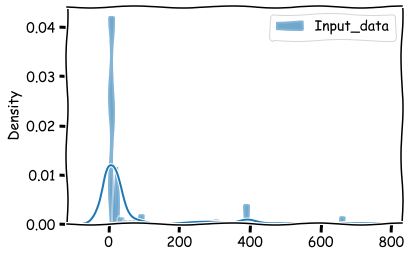

In [13]:
sns.distplot(x, label="Input_data").legend();

In [14]:
from prettytable import PrettyTable

T = PrettyTable()

T = PrettyTable(["#samples_name", "P_Mean", "Sample mean", "P_Std", "Sample Std",
                 "mu_x"+u"\u2248"+"mu", "std_x"+u"\u2248"+"std/"+u"\u221A"+"n"])

for index, X in enumerate(datasets_2):
    
    sample_mean = np.round(np.mean(X[0]), 3)
    sample_std = np.round(np.std(X[0]), 3)
    population_std_est = np.round(x.std() / np.sqrt(X[0].shape[0]), 3)
    
    row = []
    row.append('sample_'+str(index+1))
    row.append(round(x.mean(), 3))
    row.append(round(X[0].mean(), 3))
    row.append(round(x.std(),3))
    row.append(round(X[0].std(), 3))
    row.append(str(round(X[0].mean(), 3))+u"\u2248"+str(round(x.mean(), 3)))
    row.append(str(sample_std)+u"\u2248"+str(population_std_est))
    T.add_row(row)
    
print(T)

+---------------+--------+-------------+---------+------------+----------------+---------------+
| #samples_name | P_Mean | Sample mean |  P_Std  | Sample Std |    mu_x≈mu     |  std_x≈std/√n |
+---------------+--------+-------------+---------+------------+----------------+---------------+
|    sample_1   | 70.074 |    51.989   | 145.156 |  106.114   | 51.989≈70.074  | 106.114≈6.453 |
|    sample_2   | 70.074 |    44.513   | 145.156 |  107.433   | 44.513≈70.074  | 107.433≈6.453 |
|    sample_3   | 70.074 |    54.809   | 145.156 |  107.166   | 54.809≈70.074  | 107.166≈6.453 |
|    sample_4   | 70.074 |    53.253   | 145.156 |  108.785   | 53.253≈70.074  | 108.785≈6.453 |
|    sample_5   | 70.074 |    59.177   | 145.156 |   123.01   | 59.177≈70.074  |  123.01≈6.453 |
|    sample_6   | 70.074 |   100.746   | 145.156 |   152.09   | 100.746≈70.074 |  152.09≈6.453 |
|    sample_7   | 70.074 |     58.6    | 145.156 |  122.829   |  58.6≈70.074   | 122.829≈6.453 |
|    sample_8   | 70.074 |    

In [15]:
T = PrettyTable()
T = PrettyTable(["#samples", "Sample Size", "Sample mean", "Pop Std","Left C.I","Right C.I","Pop mean","Catch"])
population_std = x.std()
population_mean= np.round(x.mean(), 3)

for index, sample in enumerate(datasets_2):
    sample = sample[0]
    sample_mean = sample.mean()
    sample_size = sample.shape[0]
    left_limit  = np.round(sample_mean - 2*(population_std/np.sqrt(x.shape[0])), 3)
    right_limit = np.round(sample_mean + 2*(population_std/np.sqrt(x.shape[0])), 3)
    row = []
    row.append(index+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(population_std)
    row.append(left_limit)
    row.append(right_limit)
    row.append(population_mean)
    row.append((population_mean <= right_limit) and (population_mean >= left_limit))
    T.add_row(row)
print(T)

+----------+-------------+--------------------+-------------------+----------+-----------+----------+-------+
| #samples | Sample Size |    Sample mean     |      Pop Std      | Left C.I | Right C.I | Pop mean | Catch |
+----------+-------------+--------------------+-------------------+----------+-----------+----------+-------+
|    1     |     506     | 51.989330046936765 | 145.1555388220164 |  39.083  |   64.895  |  70.074  | False |
|    2     |     506     | 44.512513216403164 | 145.1555388220164 |  31.607  |   57.418  |  70.074  | False |
|    3     |     506     |  54.8087557312253  | 145.1555388220164 |  41.903  |   67.715  |  70.074  | False |
|    4     |     506     | 53.25259990118577  | 145.1555388220164 |  40.347  |   66.159  |  70.074  | False |
|    5     |     506     |  59.1767920701581  | 145.1555388220164 |  46.271  |   72.083  |  70.074  |  True |
|    6     |     506     | 100.74628213932807 | 145.1555388220164 |  87.84   |  113.652  |  70.074  | False |
|    7    

## 2.4 OOB Score with Confidence Intervals of 95%

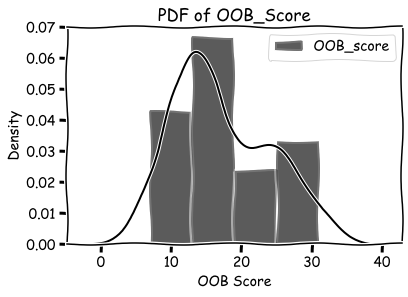

In [16]:
from sklearn.preprocessing import power_transform

OOB = np.asarray(OOB_2)
pop_MSE = np.asarray(pop_MSE_2)

sns.distplot(OOB, color='k', label='OOB_score').legend();
plt.xlabel("OOB Score");
plt.title("PDF of OOB_Score")
plt.show()

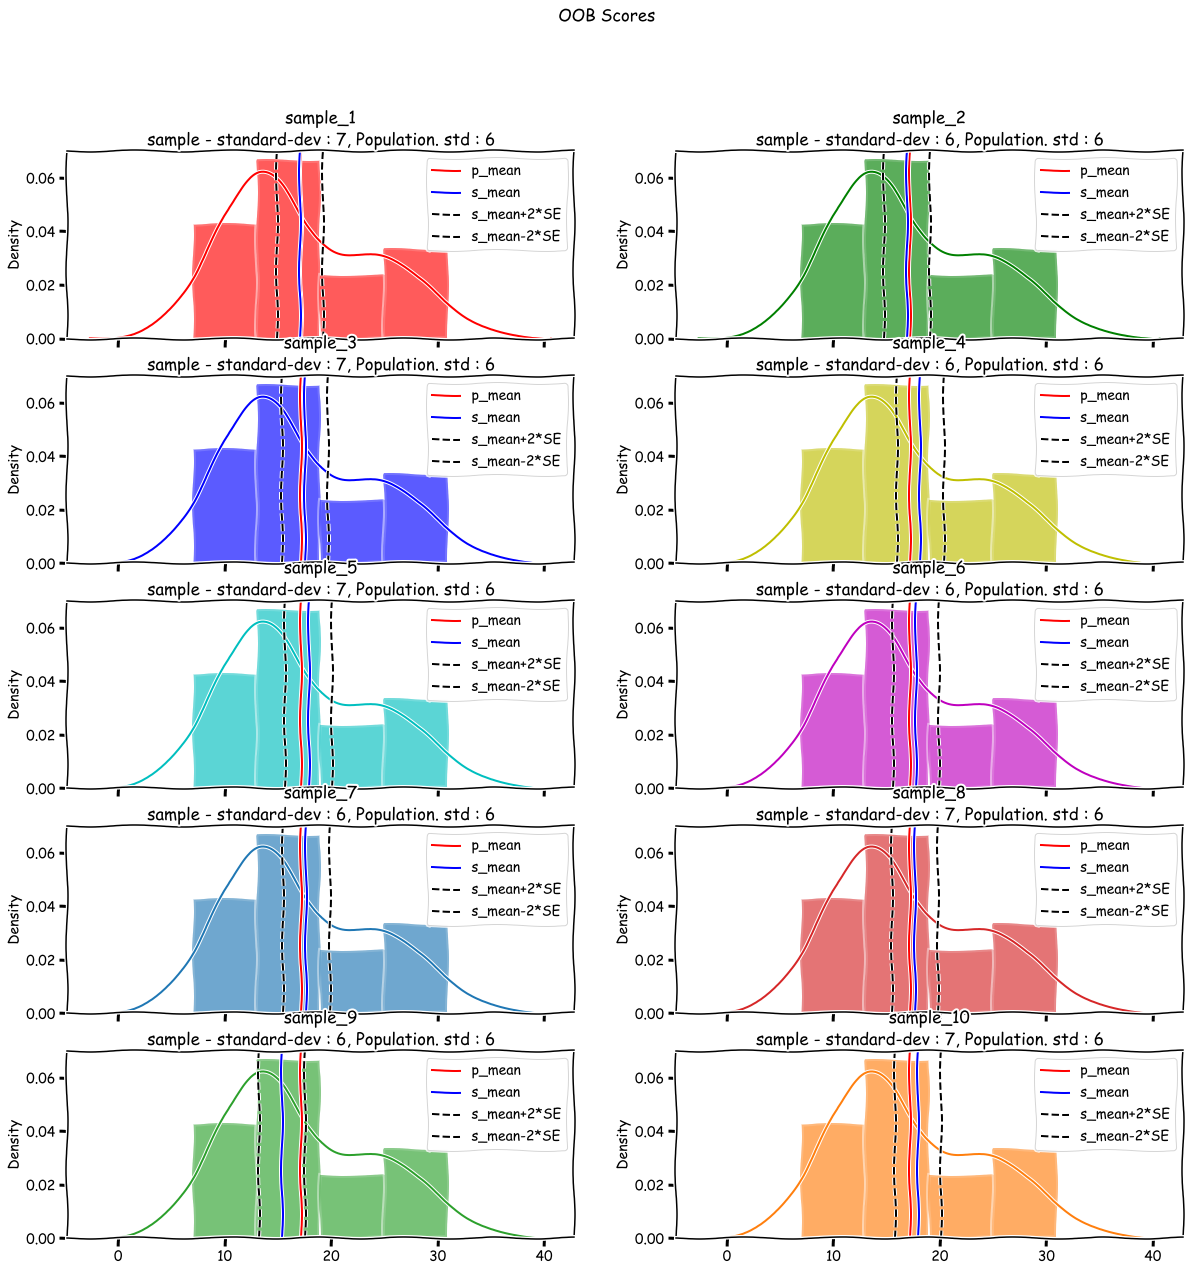

In [17]:
colrs = ['r','g','b','y', 'c', 'm', 'tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:cyan', 
         'tab:purple', 'tab:brown', 'tab:gray', 'tab:pink', 'navy']

fig, axs = plt.subplots(5, 2, sharex = True, figsize=(20,20))

row_no = 0
col_no = 0
count = 0

samples = []

for index, _ in enumerate(range(10)):

    sample_60 = OOB[random.sample(range(0, OOB.shape[0]), 21)] #60% sample, 21 pts
    sample_40 = sample_60[random.sample(range(0, sample_60.shape[0]), 14)]
    sample = np.vstack((sample_60.reshape(-1,1), sample_40.reshape(-1,1)))
    samples.append(sample)
        
    sns.distplot(OOB, color=colrs[index], ax=axs[row_no, col_no])

    axs[row_no, col_no].axvline(OOB.mean(), linestyle="-", color='r', label="p_mean")

    axs[row_no, col_no].axvline(sample.mean(), linestyle="-", color='b', label="s_mean")
    
    axs[row_no, col_no].axvline(sample.mean()+2*(OOB.std()/np.sqrt(OOB.shape[0])), linestyle="--", color='k', label="s_mean+2*SE")
    axs[row_no, col_no].axvline(sample.mean()-2*(OOB.std()/np.sqrt(OOB.shape[0])), linestyle="--", color='k', label="s_mean-2*SE")

    axs[row_no, col_no].set_title('sample_'+str(index+1) + "\nsample - standard-dev : " \
                                  +str(round(sample.std())) + ", Population. std : " + str(round(OOB.std())))

    axs[row_no, col_no].legend()

    if col_no == 1:
        col_no = -1
        row_no += 1
    col_no+=1

fig.suptitle("OOB Scores")

plt.show()

In [18]:
T = PrettyTable()

T = PrettyTable(["#samples", "Sample Size", "Sample mean", "Pop Std","Left C.I","Right C.I","Pop mean","Catch"])

population_std = np.round(OOB.std(), 3)
population_mean= np.round(OOB.mean(), 3)

for index, sample in enumerate(samples):
    
    sample_mean = np.round(sample.mean(), 3)
    sample_size = sample.shape[0]
    
    left_limit  = np.round(sample_mean - 2*(population_std/np.sqrt(OOB.shape[0])), 3)
    right_limit = np.round(sample_mean + 2*(population_std/np.sqrt(OOB.shape[0])), 3)
    
    row = []
    
    row.append(index+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(population_std)
    row.append(left_limit)
    row.append(right_limit)
    row.append(population_mean)
    row.append((population_mean <= right_limit) and (population_mean >= left_limit))
    T.add_row(row)
    
print(T)

+----------+-------------+-------------+---------+----------+-----------+----------+-------+
| #samples | Sample Size | Sample mean | Pop Std | Left C.I | Right C.I | Pop mean | Catch |
+----------+-------------+-------------+---------+----------+-----------+----------+-------+
|    1     |      35     |    17.057   |  6.461  |  14.873  |   19.241  |  17.171  |  True |
|    2     |      35     |    16.914   |  6.461  |  14.73   |   19.098  |  17.171  |  True |
|    3     |      35     |    17.543   |  6.461  |  15.359  |   19.727  |  17.171  |  True |
|    4     |      35     |    18.171   |  6.461  |  15.987  |   20.355  |  17.171  |  True |
|    5     |      35     |    17.886   |  6.461  |  15.702  |   20.07   |  17.171  |  True |
|    6     |      35     |    17.743   |  6.461  |  15.559  |   19.927  |  17.171  |  True |
|    7     |      35     |    17.686   |  6.461  |  15.502  |   19.87   |  17.171  |  True |
|    8     |      35     |    17.657   |  6.461  |  15.473  |   19.841

## 2.5 MSE with Confidence-Intervals of 95%

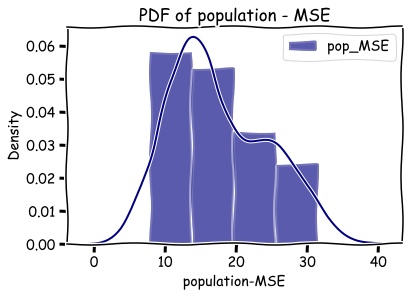

In [19]:
sns.distplot(pop_MSE, color='navy', label='pop_MSE').legend();
plt.xlabel("population-MSE");
plt.title("PDF of population - MSE")
plt.show()

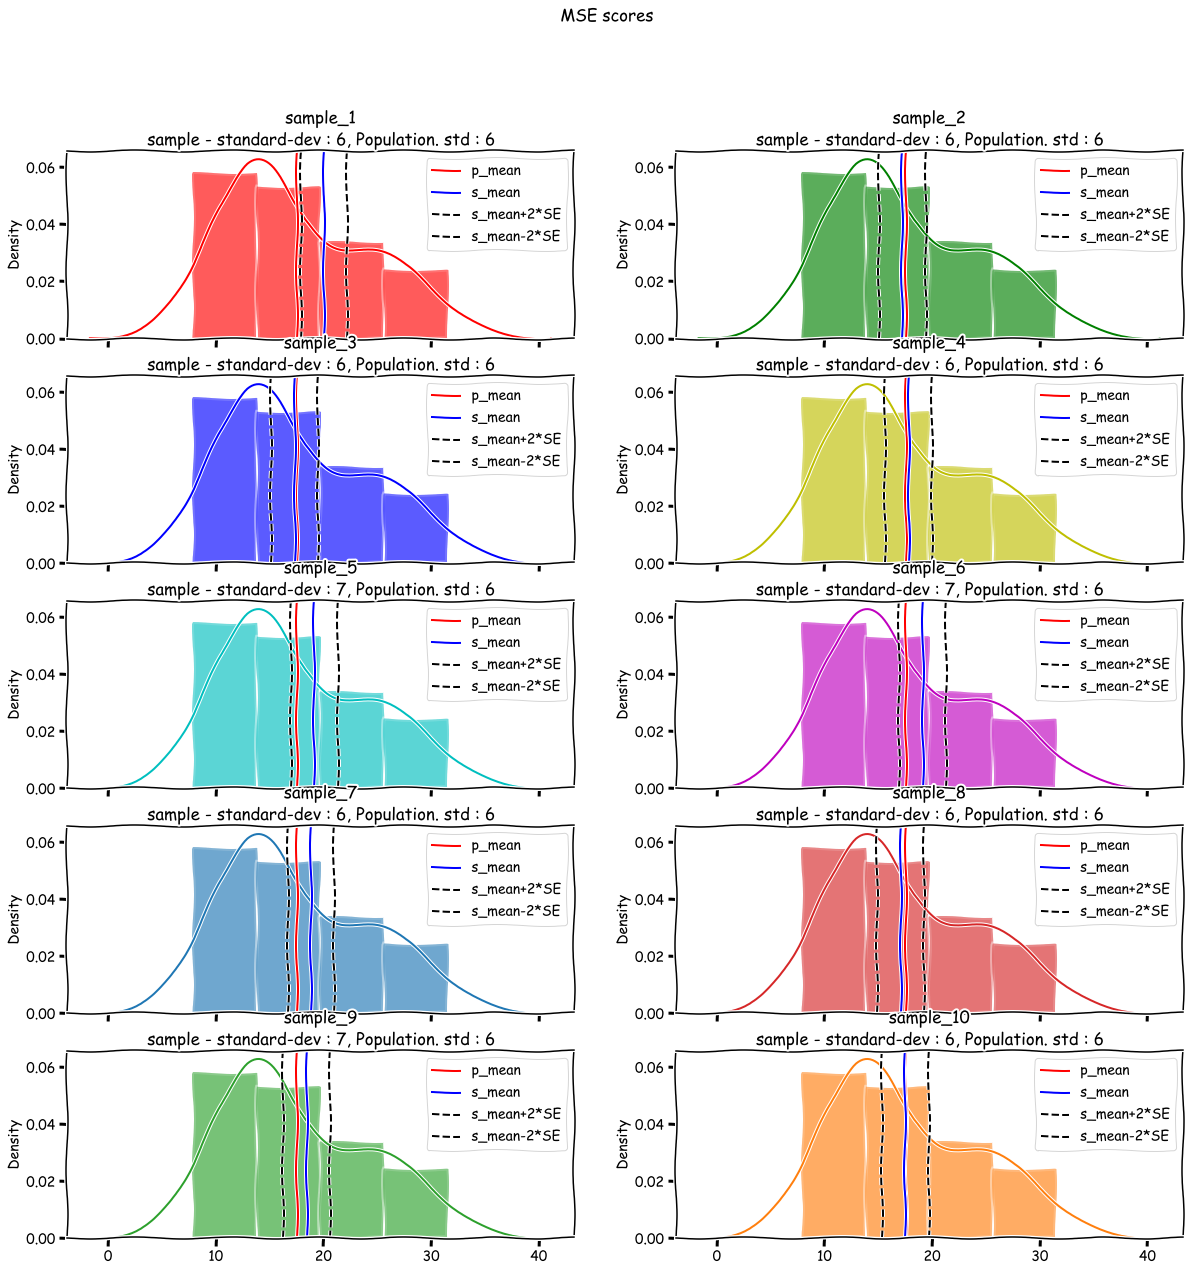

In [20]:
colrs = ['r','g','b','y', 'c', 'm', 'tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:cyan', 
         'tab:purple', 'tab:brown', 'tab:gray', 'tab:pink', 'navy']

fig, axs = plt.subplots(5, 2, sharex = True, figsize=(20,20))

row_no = 0
col_no = 0
count = 0

samples = []
for index, _ in enumerate(range(10)):

    sample_60 = pop_MSE[random.sample(range(0, pop_MSE.shape[0]), 21)] #60% sample, 21 pts
    sample_40 = sample_60[random.sample(range(0, sample_60.shape[0]), 14)]
    sample = np.vstack((sample_60.reshape(-1,1), sample_40.reshape(-1,1)))
    samples.append(sample)
        
    sns.distplot(pop_MSE, color=colrs[index], ax=axs[row_no, col_no])

    axs[row_no, col_no].axvline(pop_MSE.mean(), linestyle="-", color='r', label="p_mean")

    axs[row_no, col_no].axvline(sample.mean(), linestyle="-", color='b', label="s_mean")
    
    axs[row_no, col_no].axvline(sample.mean()+2*(pop_MSE.std()/np.sqrt(pop_MSE.shape[0])), linestyle="--", color='k', label="s_mean+2*SE")
    axs[row_no, col_no].axvline(sample.mean()-2*(pop_MSE.std()/np.sqrt(pop_MSE.shape[0])), linestyle="--", color='k', label="s_mean-2*SE")

    axs[row_no, col_no].set_title('sample_'+str(index+1) + "\nsample - standard-dev : " \
                                  +str(round(sample.std())) + ", Population. std : " + str(round(pop_MSE.std())))

    axs[row_no, col_no].legend()

    if col_no == 1:
        col_no = -1
        row_no += 1
    col_no+=1
    
fig.suptitle("MSE scores")
plt.show()

In [21]:
T = PrettyTable()

T = PrettyTable(["#samples", "Sample Size", "Sample mean", "Pop Std","Left C.I","Right C.I","Pop mean","Catch"])

population_std = np.round(pop_MSE.std(), 3)
population_mean= np.round(pop_MSE.mean(), 3)

for index, sample in enumerate(samples):
    
    sample_mean = np.round(sample.mean(), 3)
    sample_size = sample.shape[0]
    
    left_limit  = np.round(sample_mean - 2*(population_std/np.sqrt(pop_MSE.shape[0])), 3)
    right_limit = np.round(sample_mean + 2*(population_std/np.sqrt(pop_MSE.shape[0])), 3)
    
    row = []
    
    row.append(index+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(population_std)
    row.append(left_limit)
    row.append(right_limit)
    row.append(population_mean)
    row.append((population_mean <= right_limit) and (population_mean >= left_limit))
    T.add_row(row)
    
print(T)

+----------+-------------+-------------+---------+----------+-----------+----------+-------+
| #samples | Sample Size | Sample mean | Pop Std | Left C.I | Right C.I | Pop mean | Catch |
+----------+-------------+-------------+---------+----------+-----------+----------+-------+
|    1     |      35     |    20.051   |  6.425  |  17.879  |   22.223  |  17.57   | False |
|    2     |      35     |    17.231   |  6.425  |  15.059  |   19.403  |  17.57   |  True |
|    3     |      35     |    17.338   |  6.425  |  15.166  |   19.51   |  17.57   |  True |
|    4     |      35     |    17.827   |  6.425  |  15.655  |   19.999  |  17.57   |  True |
|    5     |      35     |    19.174   |  6.425  |  17.002  |   21.346  |  17.57   |  True |
|    6     |      35     |    19.137   |  6.425  |  16.965  |   21.309  |  17.57   |  True |
|    7     |      35     |    18.857   |  6.425  |  16.685  |   21.029  |  17.57   |  True |
|    8     |      35     |    17.073   |  6.425  |  14.901  |   19.245

# Task 3 :

In [22]:
pred = []

for df_row_index, data_point in enumerate([[0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60]]):
    
    for feature_index, model in enumerate(models_1):

        feature_cols = feature_index_1[feature_index]
        
        data = np.take(np.array(data_point), feature_cols).reshape(1, -1)
        pred.append(model.predict(data))

pred = np.asarray(pred)
where_are_NaNs = np.isnan(pred)
pred[where_are_NaNs] = 0

print(color.BLUE + color.BOLD + "Custom-Model Test prediction : " + str(np.median(pred)) + color.END)

Custom-Model Test prediction : 18.5


In [23]:
query = np.array([0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60])

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=3).fit(x, y.reshape(-1, 1))
print(color.BLUE + color.BOLD + "SKlearn's Test prediction : " + str(model.predict(query.reshape(1, -1))))

SKlearn's Test prediction : [18.747]


### **`OBSERVATION :`**

**`TASK 1: `**
```1. As per Central Limit theorem, When the Population distribution is non-normal (x) the sample mean approximately very near to population mean the sample distribution is Approximately Normal distribution.```

**`TASK 2: `** 
```2. As per Central Limit theorem, When the Population distribution is normal (pop_MSE and OOB-Score) the sample mean is very near to population mean the sample distribution is Approximately Normal distribution.```

**`TASK 3: `**
```3. Prediction of query point is very close to scikit-learn prediction.```